# exploring the allyhood dataset over time through executed workflows

1. find the workflows we want to extract artifacts from
2. pull the artifact location for each run
3. aggregate all taht stuff after unzipping.

In [30]:
from pandas import *
import requests, os, pandas, zipfile, io, bs4
from toolz.curried import *
__import__("requests_cache").install_cache()
__import__("dotenv").load_dotenv()
Soup = partial(bs4.BeautifulSoup, features="html.parser")

In [31]:
GH = "https://api.github.com/"

In [32]:
requests_get = partial(requests.get, headers=dict(Authorization=F"token {os.environ['GITHUB_TOKEN']}"))

In [33]:
runs = requests_get(
    GH + "repos/a11yhood/research/actions/runs", params=dict(status="completed", branch="main")
)

In [34]:
(
    df := DataFrame(runs.json())
    .workflow_runs
    .apply(Series)
);

In [35]:
(
    artifacts := df
    .artifacts_url
    .apply(requests.get)
    .apply(operator.methodcaller("json"))
    .apply(Series)
    .artifacts
    .explode()
    .dropna()
    .apply(Series)
)

,id,node_id,name,size_in_bytes,url,archive_download_url,expired,digest,created_at,updated_at,expires_at,workflow_run
0,2968130928,MDg6QXJ0aWZhY3QyOTY4MTMwOTI4,previous-119,140,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:8bb43d621fad06e8d82f3b01fd679ae64618f82...,2025-04-18T03:29:18Z,2025-04-18T03:29:18Z,2025-07-17T03:29:12Z,"{'id': 14529085551, 'repository_id': 916803041..."
0,2968132319,MDg6QXJ0aWZhY3QyOTY4MTMyMzE5,data-ravelry,1479418,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:1cedeb3ba6873a54e1858aafd446a9cc76cf788...,2025-04-18T03:29:44Z,2025-04-18T03:29:44Z,2025-07-17T03:29:12Z,"{'id': 14529085551, 'repository_id': 916803041..."
0,2968132388,MDg6QXJ0aWZhY3QyOTY4MTMyMzg4,scrape-ravelry-119,72009,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:ed09f8850e5c3875cf6f251bc5c0d681d76332a...,2025-04-18T03:29:45Z,2025-04-18T03:29:45Z,2025-07-17T03:29:12Z,"{'id': 14529085551, 'repository_id': 916803041..."
0,2968133385,MDg6QXJ0aWZhY3QyOTY4MTMzMzg1,data-github,336330,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:1f1b9bae767d5669155b863be29dd0fba4f918e...,2025-04-18T03:30:05Z,2025-04-18T03:30:05Z,2025-07-17T03:29:12Z,"{'id': 14529085551, 'repository_id': 916803041..."
0,2968133450,MDg6QXJ0aWZhY3QyOTY4MTMzNDUw,scrape-github-119,98978,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:1ab33eb9b3ba148ba4c7104f3c26d1a79d022ec...,2025-04-18T03:30:06Z,2025-04-18T03:30:06Z,2025-07-17T03:29:12Z,"{'id': 14529085551, 'repository_id': 916803041..."
...,...,...,...,...,...,...,...,...,...,...,...,...
26,2913839063,MDg6QXJ0aWZhY3QyOTEzODM5MDYz,scrape-ravelry-93,71600,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:30bbccd74ba7a0f03ee5cdce1e1193a09770d6a...,2025-04-09T18:32:22Z,2025-04-09T18:32:22Z,2025-07-08T18:31:21Z,"{'id': 14364427955, 'repository_id': 916803041..."
26,2913896845,MDg6QXJ0aWZhY3QyOTEzODk2ODQ1,data-thingiverse,2424990,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:61f80ad03e44e4ab7c27dae950b53f15b9ef61e...,2025-04-09T18:40:49Z,2025-04-09T18:40:49Z,2025-07-08T18:31:21Z,"{'id': 14364427955, 'repository_id': 916803041..."
26,2913896933,MDg6QXJ0aWZhY3QyOTEzODk2OTMz,scrape-thingiverse-93,80157,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:17d0b18e1a769e114097577b8dda828a785dc26...,2025-04-09T18:40:50Z,2025-04-09T18:40:50Z,2025-07-08T18:31:21Z,"{'id': 14364427955, 'repository_id': 916803041..."
26,2913899613,MDg6QXJ0aWZhY3QyOTEzODk5NjEz,report-aggregate-93,481595,https://api.github.com/repos/a11yhood/research...,https://api.github.com/repos/a11yhood/research...,False,sha256:14b74584f802f2900b46542ee1228c269eb9235...,2025-04-09T18:41:12Z,2025-04-09T18:41:12Z,2025-07-08T18:31:21Z,"{'id': 14364427955, 'repository_id': 916803041..."


In [36]:
aggregates = artifacts[artifacts.name.str.startswith("report-aggregate")].set_index("id")
results = aggregates.archive_download_url.apply(requests_get)

In [37]:
import pandas
import zipfile
import io
for k, result in results.items():
    pipe(result.content, io.BytesIO, zipfile.ZipFile,
        operator.methodcaller("extractall", F"past/{k}"))

In [38]:
datasets = Series(Path("past").rglob("at.json.gz")).apply(read_json)

<Axes: >

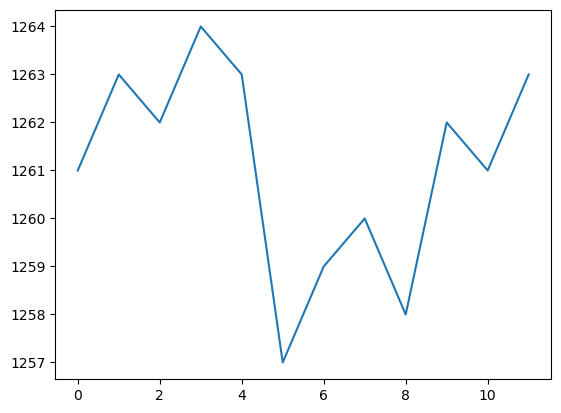

In [39]:
datasets.apply(
    lambda x: x.reindex(x.index.unique()).shape
).apply(list).apply(Series)[0].plot()